# Data Extraction

In [ ]:
# {
#   "reviewerID": "A2SUAM1J3GNN3B",
#   "asin": "0000013714",
#   "reviewerName": "J. McDonald",
#   "helpful": [2, 3],
#   "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
#   "overall": 5.0,
#   "summary": "Heavenly Highway Hymns",
#   "unixReviewTime": 1252800000,
#   "reviewTime": "09 13, 2009"
# }

## Read raw data

In [1]:
# import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

In [2]:
# read data
org_data = parse('../../data/item_dedup.json.gz')

# length distribution check
len_text, len_summary =[],[]
for d in org_data:
    len_text.append(len(d['reviewText'].split()))
    len_summary.append(len(d['summary'].split()))  
    
# import pickle 
# pickle.dump(len_text, open('len_text.pkl', 'wb'))
# pickle.dump(len_summary, open('len_summary.pkl', 'wb'))

In [1]:
# import pickle 
# len_text = pickle.load(open('len_text.pkl','rb'))
# len_summary = pickle.load(open('len_summary.pkl','rb'))

In [2]:
import pandas as pd

len_df = pd.DataFrame()
len_df['len_text'] = len_text
len_df['len_summary'] = len_summary

## Length of reviewtext

In [3]:
# length of review text 
len_df.len_text.describe()

,0
count,8.267714e+07
mean,8.484165e+01
std,1.187143e+02
min,0.000000e+00
25%,2.600000e+01
50%,4.500000e+01
75%,9.300000e+01
max,7.025000e+03


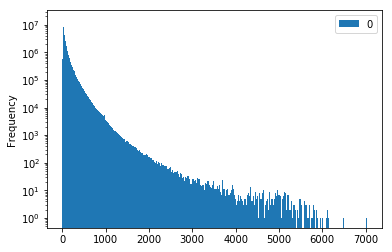

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

len_df.len_text.plot.hist(bins=1000)
plt.yscale('log')
plt.show()

[ 2343291 23306669 10918949  7524743  5704455  4537554  3661776  3005091
  2501605 11748605  6211290  1069422   130711     9595     2949      433]


Text(0.5, 0, 'Review text length')

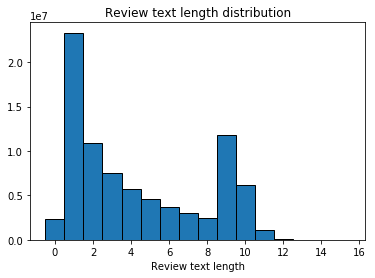

In [18]:
import numpy as np
fig = plt.figure()

bins = [0,20,30,40,50,60,70,80,90,100,200,500,1000,2000,3000,5000,7000]
hist,bins = np.histogram(len_df.len_text, bins=bins)
print(hist)

plt.bar(range(len(bins)-1),hist, width=1, edgecolor='k')
plt.title('Review text length distribution')
plt.xlabel('Review text length')
# plt.ylabel('y')

## Length of summary

In [3]:
# length of summary
len_df.len_summary.describe()

count    8.267714e+07
mean     4.064715e+00
std      2.807172e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      5.800000e+01
Name: len_summary, dtype: float64

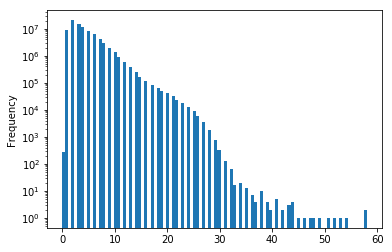

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

len_df.len_summary.plot.hist(bins=100)
plt.yscale('log')
plt.show()

In [13]:
import numpy as np
fig = plt.figure()

bins = [0,2,5,8,10,12,15,18,20,25,30,35,40,50,60]
hist,bins = np.histogram(len_df.len_summary, bins=bins)
print(hist)
# plt.bar(range(len(bins)-1),hist, width=1, edgecolor='k')
# plt.title('Review summary length distribution')
# plt.xlabel('Review summary length')

[ 8992765 46241975 18535359  4815326  2267175  1198742   364451   111255
   128463    21008      555       38       21        6]


<Figure size 432x288 with 0 Axes>

In [101]:
df

{0: {'asin': '0000013714',
  'helpful': [0, 0],
  'overall': 4.0,
  'reviewText': 'Heavenly Highway HymnsI ordered this hymnal because I learned to read shaped note music when I was a teenager. I play piano but do not sing. I am 85 years old. This hymnal has mostof the songs I have learned over the years. It was exactly what I wanted and needed.It was in good condition and the price was right. I purchased this book from Amazon.',
  'reviewTime': '10 16, 2012',
  'reviewerID': 'A3BED5QFJWK88M',
  'reviewerName': 'jimedd',
  'summary': 'Heavenly Highway Hymns',
  'unixReviewTime': 1350345600},
 1: {'asin': '0000013714',
  'helpful': [2, 3],
  'overall': 5.0,
  'reviewText': 'I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!',
  'reviewTime': '09 13, 2009',
  'reviewerID': 'A2SUAM1J3GNN3B',
  '

In [69]:
print(data.reviewText[0])
print('summary:', data.summary[0])
data[['asin','reviewText','summary']]

You may laugh, but I have found that Otherland volumes 1-4 are poor at picking up debris around the house.  I once spilled some cornflakes on the floor, and foolishly thought that I could clean it up by dropping &#34;City of Golden Shadows&#34; on it.  Not only did it not clean, it managed to make things worse by fragmenting the cornflakes into smaller and smaller pieces.  I did what any normal person would do: I stacked the other books on top, hoping that the combined power would whisk the cornflakes away to the technological wonderland that is Otherland.  No such results.Bin Otherland Empty, on the other hand, works like magic.  If you hook it up to a powerful enough motor, you can banish those cornflakes to the land of wind and ghosts.  The downside is that it's pretty light reading, but given the young adult trend these days it's following the light reading trend that literature is headed for these days.It's recommended that you get through the previous volume though (&#34;Hoover E

,asin,reviewText,summary
0,0000029831,"You may laugh, but I have found that Otherland...",The superior cleanser
1,0000029831,Do not try and vacuum the dust. That's impossi...,Very deep and thought provoking.
2,0000029831,What if Dread had come out victorious and left...,WHAT IF....?


In [8]:
df = getDF('../data/item_dedup.json.gz')

10000 th row:  {'reviewerID': 'A31058CO8X7LQN', 'asin': '000224053X', 'reviewerName': 'atr1688 "atr1688"', 'helpful': [2, 14], 'reviewText': 'It would take to many time to explain all the reasons why i loved this and the two following books. If you like hard sci-fi its a must read book.', 'overall': 5.0, 'summary': 'Best Science- Fiction ever red', 'unixReviewTime': 1106784000, 'reviewTime': '01 27, 2005'}
20000 th row:  {'reviewerID': 'AYE6KHD4A9CJN', 'asin': '0005019281', 'reviewerName': 'Kevin Barnett "KD Barnett"', 'helpful': [0, 0], 'reviewText': "I first saw this movie as a kid in the late 70's. I never forgot and when i found it on dvd i could not resist. It brought just as much enjoyment now as then. I like the twist on a classic with an American version.", 'overall': 4.0, 'summary': 'The Fonz does Scrooge', 'unixReviewTime': 1261526400, 'reviewTime': '12 23, 2009'}
30000 th row:  {'reviewerID': 'AQ5U1DAQLGKK1', 'asin': '0006550436', 'reviewerName': 'Lily', 'helpful': [0, 0], '

110000 th row:  {'reviewerID': 'A1EOZJW1OPR01', 'asin': '0007447868', 'reviewerName': 'Karen Miller', 'helpful': [22, 33], 'reviewText': "While I absolutely believe that there is no 'right' or 'wrong' response to a book, because it's all just personal opinion, I'm taken aback by some of the hostility I'm seeing here.If you went to see a play, would  you complain the story wasn't finished at the end of the first act? No. There's an interval and then there's a second act, and then there's the end. So okay, this story has more than 2 acts. By the end it will have, maybe, 7. So it's not really fair to say 'these characters aren't important' or 'this was just a bridge' or 'we didn't get to the end' ...  because until we do reach the end, we can't tell.I believe Martin is the single greatest fantasy writer of our time. I think he will go down in history as one of the greatest, full stop. Was I frustrated at the long time between books 3 and 4? You'd better believe it. Am I sorry that some of

230000 th row:  {'reviewerID': 'A28I5ZYRQ58VGD', 'asin': '0060282983', 'reviewerName': 'gwen wall', 'helpful': [0, 0], 'reviewText': 'The world needs to love one another again just as the characters in this story did!  Charlotte teaches us the true meaning of giving and love.', 'overall': 5.0, 'summary': 'A Wonderful Love Story', 'unixReviewTime': 1402444800, 'reviewTime': '06 11, 2014'}
240000 th row:  {'reviewerID': 'AE14CDBIN1KYA', 'asin': '0060392886', 'reviewerName': 'B. M. Ballard "Book Lover"', 'helpful': [0, 0], 'reviewText': 'This book was fantastic I loved the whole thing and read it in about 2 days. I would have liked to hear from Tommy Lee more as I found him to be the funniest and most interesting to read. All in all an awesome book that deserves 5 stars!!', 'overall': 5.0, 'summary': "Rockin' Book", 'unixReviewTime': 1163203200, 'reviewTime': '11 11, 2006'}
250000 th row:  {'reviewerID': 'A1US8UAPHMFBKW', 'asin': '0060509546', 'reviewerName': 'Gayle "brighttyger"', 'helpf

360000 th row:  {'reviewerID': 'A2TX179XAT5GRP', 'asin': '0060739592', 'reviewerName': 'TeensReadToo "Eat. Drink. Read. Be Merrier."', 'helpful': [10, 10], 'reviewText': 'Twelve-year-old Fern McAllister is the black sheep of her family, set apart by pale skin that blisters after moments in the sun and dark black hair in a family of blondes. Her strange sensitivity to light, and seeming ability to communicate with the family dog, are secondary concerns to the kids at her middle school who tease her for having an absent father. Despite gaining herself the nickname "freaky Fern," she leads a generally happy life, thanks to her mother\'s caring and her twinbrother Sam\'s friendship.But one day in the middle of English, Fern simply disappears. No one can find her; no one has seen her leave the room, much less her desk. Unbeknownst to her classmates, Fern has somehow managed to teleport to Pirate Cove, her favorite part of a nearby beach. Frightened and unsure of how she got there, Fern trie

410000 th row:  {'reviewerID': 'A2Q20HP871VSKW', 'asin': '0060820942', 'reviewerName': 'JerseyTomato', 'helpful': [21, 21], 'reviewText': "I cannot say enough wonderful things about this cookbook.  People have mentioned the beautiful photos and yes, they are certainly there.  The writing helps to weave a spell about the recipes.  You are not just making a soup, but the soup her aunt used to make when...The recipes will knock your socks off.  The roasted tomato tart is worth the price of the book.  My book club was blown away by the bluberry tart.  A gluten intolerant guest was thrilled with Gateau Lawrence.  (Flourless chocolate.  Easy, intense, and will make you a legend among your friends).  The soups are excellent too.  Oh yes, and the cabbage pie (galette) I made just because it sounded so weird, that was wonderful too.  The recipes seem to 'work' if you know what I mean.  You may choose to reduce the butter and make adjustments, but they turn out beautifully as written.One complai

540000 th row:  {'reviewerID': 'A1NWPOFCB9C7IL', 'asin': '0061093092', 'reviewerName': 'ReasonableGoatPerson', 'helpful': [0, 0], 'reviewText': 'Lawyer is a 7-letter word in my vocabulary, so color me shocked when I started reading Lily White, with a lawyer as its main character, and I was actually liking Ms White, not cursing her; nor imagining creative & painful ways in which she could be killed off, but wishing her a long and happy life. Surprise!The story is told in alternating chapters: one chapter in "the present", where Lily (known as Lee) is working as lawyer for a conman accused of murdering one of his marks; and then one in "the past", that tells Lee\'s life story, from her parents\' marriage, her subsequent birth, up until close to the time of the present-day story. Forth and back it goes.From the get-go, there are intimations of where the conman story is going, and really it\'s just a matter of how it plays out. Still, even despite knowing, I couldn\'t wait to find out what

670000 th row:  {'reviewerID': 'AY6L3PPCYAUS0', 'asin': '0061568228', 'reviewerName': 'Emrys R. Lloyd-Roberts', 'helpful': [10, 36], 'reviewText': 'This book starts with the premise that we do not know anything about the original gospels, now forming part of the new Testament, and then goes on to form a theological view based on what he images those original texts say. There are no facts about these gospels, only assumptions and conjecture.If you want a book about religion without reason and logic, this is your book.', 'overall': 1.0, 'summary': 'Salvation', 'unixReviewTime': 1347580800, 'reviewTime': '09 14, 2012'}
680000 th row:  {'reviewerID': 'ADFS4PIEY14G6', 'asin': '0061628018', 'reviewerName': 'Barbara N. Bybee "barbara_bybee         6867 ...', 'helpful': [1, 1], 'reviewText': "Excellent book....I'm from Utah and Warren Jeffs is in prison.....Yay,  Well, written.  Happy to see this intelligent girl is out of his clutches.", 'overall': 5.0, 'summary': 'Elissa Wall story.', 'unixR

800000 th row:  {'reviewerID': 'A1Q50CMX1G68LS', 'asin': '0061965804', 'reviewerName': 'cb', 'helpful': [3, 3], 'reviewText': 'Kind of an Ice Station Zebra,The Thing,meets an episode of x-files redux.The hero and heroine are seriously annoying.The tough-girl professor with the rabid anti-gun,anti military attitude gets old fast. As does her constant whining about things like a multi-million dollar heavy equipment elevator not being safe for her kid and complaining when someone opens a helicopter window because her kid might catch a draft.Coupled with asking if the real motive for the expedition is to allow "corporations" to rape the continent.Its all just a little too much for me.Our "hero" spelunker from Austrailia quickly realizes that the quickest way to professor moms heart is through the kid and makes every attempt to assure that he makes him his "little buddy". All the while complaining that the Military is destroying the "environment".Some might like it but......yeah, I\'m sendi

860000 th row:  {'reviewerID': 'A38RLKRBJOPTBW', 'asin': '0062024027', 'reviewerName': 'Autumn', 'helpful': [0, 0], 'reviewText': "LOVE.THIS. BOOK. If you are planning on seeing the new Divergent movie, don't until you read the book. Half of the movie won't make sense if you don't. I recommend this book to anyone 10-100.", 'overall': 5.0, 'summary': 'Just Another Divergent Fan', 'unixReviewTime': 1402963200, 'reviewTime': '06 17, 2014'}
870000 th row:  {'reviewerID': 'A18FKLN6W1O39B', 'asin': '0062026542', 'reviewerName': 'Lindsey Maxwell', 'helpful': [1, 1], 'reviewText': "I am trying to encourage everyone I know to read this series! No one listens to me. Rae Carson is unpredictable so I really didn't know how it was going to end. I just want everyone to pick up this series and read it. It was amazing. I giggled like a school girl and whooped through out this series. Loved the Hector chapters. The first time the chaper heading said &#34;Hector&#34; I believe I said out loud, &#34; Oh 

1000000 th row:  {'reviewerID': 'A3N4YAHBI0JRNF', 'asin': '0062217208', 'reviewerName': 'Ellen Horan "DOMAGRACE"', 'helpful': [9, 15], 'reviewText': "There is nothing more frightening than being wrongly accused. In a perfect world, one would simply correct the error and move on. What makes this a gripping book and a horror tale of sorts, is that Amanda Knox became trapped in an international legal nightmare. She was a middle class American student, who ended up in solitary confinement and imprisoned with hardened criminals for over four years for a murder that no rational person would think she committed. How that day to day reality unfolded is the basis of this book, up to her release. The who what and why it happened is still a mystery. Why did the Italian prosecutor hate her? Was the DNA evidence tampered with to frame her? Why did the legal system fail her? Where WAS the American consulate at any time, and early on in her ordeal? Where was the American State Dept? There are lots of

1140000 th row:  {'reviewerID': 'A1NATT3PN24QWY', 'asin': '0071373365', 'reviewerName': 'Rolf Dobelli "getAbstract"', 'helpful': [5, 15], 'reviewText': "Mark J. Barrenechea, a senior vice president for applications development at Oracle Corp., describes how to transform a company by using a range of e-business applications. He draws on Oracle's success at changing its business by using the Internet and networking to interconnect employees, customers and suppliers. Barrenechea's useful roadmap shows how your company can apply these methods to coordinate, systematize and streamline operations. He demonstrates how other companies - including General Motors, Boeing and Microsoft - use e-business networking. He writes in a straightforward style without jargon and maintains a keen focus on operations, making this book a wealth of practical knowledge. Of course, that same focus might limit the book's appeal to executives without an interest in operations technology and to other mainstream rea

1240000 th row:  {'reviewerID': 'A2KFOGTNOM42UH', 'asin': '0073376450', 'reviewerName': 'Deezer "Deezer"', 'helpful': [1, 3], 'reviewText': 'Great condition and quick service  - I was very pleased with this vendor in purchasing this book.  The whole process was quick and easy', 'overall': 5.0, 'summary': 'Great service', 'unixReviewTime': 1315180800, 'reviewTime': '09 5, 2011'}
1250000 th row:  {'reviewerID': 'A37M8Z2H5W7762', 'asin': '0073527963', 'reviewerName': 'Yeed', 'helpful': [0, 0], 'reviewText': 'The book is lengthy and is everything you expect from a criminal justice book with some added bonuses such as little included stories in the chapter to help the reader to better understand the concepts and chapter as well as the vocabulary of the text book.', 'overall': 4.0, 'summary': 'Criminal justice', 'unixReviewTime': 1360972800, 'reviewTime': '02 16, 2013'}
1260000 th row:  {'reviewerID': 'AC9ZMFQB5BAV6', 'asin': '0077514742', 'reviewerName': 'Nicole', 'helpful': [0, 0], 'review

1340000 th row:  {'reviewerID': 'A3ETKB8439BBQR', 'asin': '0123694736', 'reviewerName': 'T. Cunningham "Rb Man"', 'helpful': [1, 1], 'reviewText': "If all of the Apple frameworks were explained as well as CoreGraphics/Quartz is in this book, life would be so much better for independent programmers. I am not writing code in XCode, but one where I need to port calls to custom classes. This book has helped me so much. I have not located the link on the publisher's site (maybe I'm just missing it), but my only complaint (a very minor one) would be that they don't have a contact email for the authors to report errata or thank them.Well written, to the point, good code examples and does not duplicate the Apple documents. Covers Carbon and Cocoa calls. The chapters on axial and radial shadings were the most helpful for me.", 'overall': 5.0, 'summary': 'Excellent Book', 'unixReviewTime': 1179014400, 'reviewTime': '05 13, 2007'}
1350000 th row:  {'reviewerID': 'AF0W0VJRVCE99', 'asin': '01302080

1440000 th row:  {'reviewerID': 'ABYT6AXJ1TEO9', 'asin': '0138419418', 'reviewerName': 'Vivien', 'helpful': [0, 0], 'reviewText': "This is my textbook.  but i don't like it very much.  i am the beginner of the JavaScript, this book even doesn't help me at all.  there are a lot of things had not talked about it before it pop up, it just suddenly appear before your eyes.  I always get lost because of that.", 'overall': 1.0, 'summary': 'If your are the beginner, this is not your choice !!!!!!!', 'unixReviewTime': 1016409600, 'reviewTime': '03 18, 2002'}
1450000 th row:  {'reviewerID': 'A3RKEF64X6KZ17', 'asin': '0140053204', 'reviewerName': 'C. Lewis', 'helpful': [0, 0], 'reviewText': 'Easy read, lots of cute one-liners and a little wisdom.  Interesting to read about his Southern encounters in the 1960s.', 'overall': 4.0, 'summary': 'Nice read', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
1460000 th row:  {'reviewerID': 'A1Y8CLNTCLR04O', 'asin': '0140098275', 'reviewerName':

1520000 th row:  {'reviewerID': 'A1T17LMQABMBN5', 'asin': '0140298479', 'reviewerName': 'CoffeeGurl', 'helpful': [8, 8], 'reviewText': "This novel was a great read, it was hilarious.  May I say that I think it's funnier than the original. Of course, it is not very different from the original -- she is still trying to quit smoking and trying to lose  weight, but the heroine seems a little more together this time  around.There was a setback, the whole death threat thing, for a minute  there I thought I was reading a mystery novel (I hate mystery novels) --  but other than that, it is great!  I was cracking up on the subway train on  my way to work this morning while I read the chapter in which she was  interviewing Colin Firth -- the actor who played Mr. Darcy in Pride and  Prejudice. The people on the train were staring at me, but I couldn't help  it, it was too funny.I know it sounds insane but I do wish Miss Fielding  writes another Bridget Jones novel. I would happily buy all the Bri

1600000 th row:  {'reviewerID': 'A1ZWGRWZV428LV', 'asin': '014104022X', 'reviewerName': 'Brian', 'helpful': [0, 0], 'reviewText': 'A wonderful story full of many aspects of the many facets of a hard and difficult journey. Warm strong emotional.', 'overall': 5.0, 'summary': 'A heart warming story', 'unixReviewTime': 1382486400, 'reviewTime': '10 23, 2013'}
1610000 th row:  {'reviewerID': 'A1ZPO4Y05SPIWW', 'asin': '0141187425', 'helpful': [16, 28], 'reviewText': "Drawing upon the work of Michel Foucault, Edward Said claims that Western ideas of the `Orient' are not based upon objective facts but are created through academic and cultural `discourses' which serve to promote Western imperialism - often despite `liberal' intentions.This mythical `East' is the antithesis of the West, a negative or inversion of the 'Occident' which is used to define *both* in binary opposition to each other, and to facilitate the political and domination of the East.However in order to demonstrate the existenc

1690000 th row:  {'reviewerID': 'A14JH0ILQ660IT', 'asin': '0142196193', 'reviewerName': 'Free Polazzo', 'helpful': [5, 8], 'reviewText': 'I really like these books and the way they are written.  The question and answer format make it easy to use it as a "reference" and also allows one to read a few pages at a time.The question and answer format is also wonderful because alot of what Judiasm is about is questions.  "Question Everything" must have been the eleventh commandment.What is missing are important topics.  I wrote to the author in 1996 and he was kind enough to repy to my question.  I wrote:"I enjoy reading your book . . .  However, there is a major omission that I need to ask about.  Why is the subject of War (and violence) not covered?Your biography says you were/are active as a military chaplain.  I imagine that your role as chaplain and advisor to chaplains would put you in a great position to speak to the question of war and Jewish Law.Perhaps your wrote about this in anoth

1780000 th row:  {'reviewerID': 'A23ORR2740NR2U', 'asin': '0143037838', 'reviewerName': 'Greg Beesch "GregB"', 'helpful': [25, 34], 'reviewText': 'The tone of arrogance and condescension really diminish what would otherwise be a good autobiographical case study of growing a hobby/skill into a successful brand. Critical self assessment is sometimes subordinated to over emotive passages and screeds about Chouinard\'s take social and economic trends.  Some of the more interesting aspects of forming company goals and culture were lost amid a general tone of contempt for what Chouinard considers `the business world\'.  The good stuff is there, you just have to get past the maverick chest thumping and "I am a reluctant businessman and I run my business better without old and tired business practices and paradigms. . . like profit".Two things were rather galling. First, the first sentence "No young kid growing up ever dreams of becoming a businessman." Well, sorry, a lot of kids actually do, 

1890000 th row:  {'reviewerID': 'A1FPVKQVRRF2ZA', 'asin': '0143170104', 'reviewerName': 'Amy Senk "Read it, Loved it"', 'helpful': [0, 1], 'reviewText': "The Girl Who Played With Fire is better than the first book -- and I adored the first book, so that's saying something. In this second book of the trilogy, we learn about Lisbeth -- everything from what she did right after the first book ended to what made her the person she became -- in a complicated, intricately plotted story.The opening scenes with Lisbeth enjoying new riches on the beach didn't seem to add much to the story, but once she was home in Europe, wham! It was like a roller coaster taking off, with journalists doing their thing, sex traders doing their thing, killers doing their thing and Lisbeth doing her thing.The story, told through various characters' perspectives, is gripping and entertaining. And the ending is great -- answering questions but raising new ones.When is book three coming out in the U.S.??", 'overall':

1990000 th row:  {'reviewerID': 'ATB5DQ3SVQ27G', 'asin': '0195014766', 'reviewerName': 'Charles Bukowski "buk1818"', 'helpful': [0, 8], 'reviewText': 'this book is in excellent shape.  BUT, I ordered it on May 5th , 2009, and did not receive it until June 1st, 2009.  That is way way way way too long to get my book, and I will not order from this customer again.', 'overall': 4.0, 'summary': 'The Art of War, by Sun Tzu, Thomas Cleary used book', 'unixReviewTime': 1244246400, 'reviewTime': '06 6, 2009'}
2000000 th row:  {'reviewerID': 'A1VE8QL8RJ9SCU', 'asin': '0195103092', 'reviewerName': 'tyler zarubin', 'helpful': [0, 7], 'reviewText': 'upon pondering motives for writing this everlasting existential review, i have prostrated that this novel portrays one tipple of a protagonist who through the use of foretasting one is able to percieve ebony in the  circumstances faced by Capitu.  a most separatist prognosis is in order for  this linear novel.', 'overall': 5.0, 'summary': 'an insightful

2080000 th row:  {'reviewerID': 'A2FC00C1NFO59J', 'asin': '0201632160', 'reviewerName': 'Leo Free "Art Scents"', 'helpful': [3, 4], 'reviewText': "I first saw a picture or two on some program to download desktop photos.  I followed some info cuz I was captivated by the Alice pictures.  I discovered Robyn's journey, story and this story book.  I considered buying a used one, but decided to get a new one.  I just love the whole of it and so appreciate  the author not only taking the journey but sharing it with the rest of us.  Even if some of the sharing was against her original plans.  Thanks Robyn.  Your journey touches deeply in inexplicable ways.", 'overall': 5.0, 'summary': 'e Intimacy of Inspiration', 'unixReviewTime': 1171152000, 'reviewTime': '02 11, 2007'}
2090000 th row:  {'reviewerID': 'A3705CPTAQ8BQV', 'asin': '020502940X', 'reviewerName': 'sagarcia_1', 'helpful': [1, 1], 'reviewText': 'Buying the Kindle version, I now have access to it on my MacBook Pro, iPad, and iPhone. Si

2220000 th row:  {'reviewerID': 'A4AU217EBQ47L', 'asin': '0271021195', 'reviewerName': 'D. Moore "Clouseau"', 'helpful': [2, 2], 'reviewText': "A thoughtfully detailed and entertaining narrative with lots of captivating photos of the key people and places of Lincoln's visits to the Commonwealth.  I also liked the appendix which provided guidance on how to follow and experience the Lincoln Trail. I'm not a Lincoln expert, so the accounts of his experiences here were new to me and fascinating to read... but that also means my rating is just a reflection of how much I liked this book, not a comparison to other books about Mr. Lincoln. It is unquestionably well-written.", 'overall': 5.0, 'summary': 'Fascinating,  highly detailed, great pictures!', 'unixReviewTime': 1011139200, 'reviewTime': '01 16, 2002'}
2230000 th row:  {'reviewerID': 'A2IO5NPN61YVWZ', 'asin': '0292716265', 'reviewerName': 'William R. Robertson', 'helpful': [0, 0], 'reviewText': 'I thoroughly enjoyed "One Ranger" and thi

2320000 th row:  {'reviewerID': 'AFZG8ESZAYAYA', 'asin': '0307265757', 'reviewerName': 'Alexander R. Seals', 'helpful': [1, 2], 'reviewText': 'Very descriptive, yet very entertaining, story of Pixar.  This book is told from an unbiased point of view and is engaging from beginning to end.  Definitely recommend for any fan of Pixar!', 'overall': 5.0, 'summary': 'Engaging and Entertaining!', 'unixReviewTime': 1230249600, 'reviewTime': '12 26, 2008'}
2330000 th row:  {'reviewerID': 'A2P5XNVLKUIWR', 'asin': '0307268934', 'reviewerName': 'Ann H Smith', 'helpful': [0, 1], 'reviewText': 'This adventure is blended with  both history and anthropology.  It is informative and compelling.  I do not recommend it for those who only like romance novels or are squemish. It is very informative about an area many of us know little about.', 'overall': 5.0, 'summary': 'GREAT TRUE STORY PLUS HISTORY', 'unixReviewTime': 1354665600, 'reviewTime': '12 5, 2012'}
2340000 th row:  {'reviewerID': 'A356JAJSFPFB5P',

2390000 th row:  {'reviewerID': 'AV09RSTTTQLJW', 'asin': '0307292134', 'reviewerName': 'Logan Ralph', 'helpful': [0, 1], 'reviewText': "Mr. Martin has a gift for great storytelling. I can't wait to check out the HBO series to see how it stacks up to the books. A great read and an even greater escape!", 'overall': 5.0, 'summary': 'A Song of Ice and Fire, Books 1-4', 'unixReviewTime': 1371427200, 'reviewTime': '06 17, 2013'}
2400000 th row:  {'reviewerID': 'A10AVWN2AVDV0V', 'asin': '0307340805', 'reviewerName': 'R. Moore', 'helpful': [0, 1], 'reviewText': "A classic and must-have for every child's book collection. Golden Books are so fun, and this is a great set to get started with.", 'overall': 4.0, 'summary': 'A classic!', 'unixReviewTime': 1225670400, 'reviewTime': '11 3, 2008'}
2410000 th row:  {'reviewerID': 'A25JGEQR5CTSCD', 'asin': '0307346609', 'reviewerName': 'Donna Kuhlmorrison "dragonlady444"', 'helpful': [0, 0], 'reviewText': "I didn't actually see or read the book, it was a 

2480000 th row:  {'reviewerID': 'A1CUZ9COVUDK0J', 'asin': '0307457753', 'helpful': [0, 0], 'reviewText': "What a fantastic book on how we can be bold and relentless in Christ. As a believer in the gifts of God and all that we have power to do through the Holy Spirit this book was an amazing read.  I can't wait to share this book with my congregation and get down to work on what we have authority to do in this world.Never give up! Keep knocking and seeking God for what it is we have authority over!*I received this book as part of the Blogging for Books from waterbrookmultnomah*", 'overall': 5.0, 'summary': 'Wow!', 'unixReviewTime': 1335312000, 'reviewTime': '04 25, 2012'}
2490000 th row:  {'reviewerID': 'AT2EFXZXSSN0R', 'asin': '0307462889', 'reviewerName': 'Judith L', 'helpful': [1, 1], 'reviewText': "This is a very practical guide and learning book for those of us evolving into what our society (laughingly) calls 'senior-hood' - whatever that means.  Clearly, Martha is an example of g

2630000 th row:  {'reviewerID': 'A3K6AG60YBLNZY', 'asin': '0307749649', 'reviewerName': 'Judy Aishman', 'helpful': [0, 0], 'reviewText': 'I loved the continuation of the story line & characters from his previous book. It was hard to figure out who the bad guys were.', 'overall': 4.0, 'summary': 'A very good read', 'unixReviewTime': 1384300800, 'reviewTime': '11 13, 2013'}
2640000 th row:  {'reviewerID': 'A10Z7AYDEVC6S6', 'asin': '0307885259', 'reviewerName': 'farm girl', 'helpful': [0, 0], 'reviewText': 'I felt it dragged along and took forever to get new information.  Get to the point of what you want to say.', 'overall': 3.0, 'summary': 'too much needless info', 'unixReviewTime': 1376438400, 'reviewTime': '08 14, 2013'}
2650000 th row:  {'reviewerID': 'A2GXRU3M22GWY1', 'asin': '0307887898', 'reviewerName': 'Ilya B.', 'helpful': [0, 0], 'reviewText': 'This is a very well written book with implementable advice for anyone who either aspires to create a technology business or experiments

2800000 th row:  {'reviewerID': 'A3BPB7823FZGU2', 'asin': '0310318653', 'reviewerName': 'Crystal DeKalb', 'helpful': [0, 1], 'reviewText': 'One of the most awesome Spirit-filled reads I have come across in a long time.  I am ordering more for my friends and family.  OUTSTANDING!!!', 'overall': 5.0, 'summary': '"One Thousand Gifts"..a breathtaking gift all its own!', 'unixReviewTime': 1350691200, 'reviewTime': '10 20, 2012'}
2810000 th row:  {'reviewerID': 'A2FFL3BAVY9O1V', 'asin': '031032906X', 'reviewerName': 'Adam G Binley', 'helpful': [2, 2], 'reviewText': 'Whether you agree with Rick Warren or not this book is a great read and offers great insight into the mind and character of God. I have been richly blessed learning about the will of God and his purpose for my life. Thank you.', 'overall': 5.0, 'summary': 'A book everyone should read', 'unixReviewTime': 1394323200, 'reviewTime': '03 9, 2014'}
2820000 th row:  {'reviewerID': 'A3JRNFSKJR4C2N', 'asin': '0310332796', 'reviewerName': 

2920000 th row:  {'reviewerID': 'A1K3866HEJZ8RP', 'asin': '0312264917', 'reviewerName': 'Locococo', 'helpful': [19, 21], 'reviewText': 'Chadwick\'s writing is superb, her knowledge of all things medieval and the wool trade is beyond question, but couldn\'t we have chosen more sympathetic characters? Miriel starts off promising as a victim of her mother\'s bad decision in a husband. She\'s been groomed for the wool trade by her indulgent and successful grandfather but then rushed to the nunnery. She\'s constantly a thorn in the side of the nuns and then meets deathly ill Nicholas, who was washed ashore from an ill-fated baggage wain of King John. She helps to nurse him back to health (did we forget there were two other nuns involved in his nursing?), then runs away from the convent when they rid her of her one vanity - her hair - after she shows it off to Nicholas and gets caught. We see this character lie, cheat, steal, and then marry twice to further her position. She commits adultery

3020000 th row:  {'reviewerID': 'A22IKTDMVR681U', 'asin': '0312366523', 'reviewerName': 'gbear "al"', 'helpful': [8, 10], 'reviewText': "I bought this book mostly because I wanted to read stories about Ron's days with The Faces. I saw them play many times and they were one of my favorite live bands back in the late 70's.I'm sure that Ron Wood's story is interesting and compelling on many levels, but this book is a waste. Disorganized doesn't begin to cover how haphazardly this book is assembled. It doesn't work as history, it doesn't work as adventure, and it barely works as biography. It works best as an exercise in cluelessness, as Ron doesn't seem to have any idea how screwed up he sounds. One minute he's writing about how spectacularly broke he is, then within two sentences he's talking about flying off for a tropical vacation somewhere. Supposedly earthshattering events in his life are covered in one sentence (the deaths of loved ones is used to justify more drugs and booze). Havi

3140000 th row:  {'reviewerID': 'AV1D9B474J6LH', 'asin': '0312581777', 'reviewerName': 'LM', 'helpful': [1, 1], 'reviewText': 'This book is a must read if you have any political interests.  The subject seem to be covered very well.  I does seem to be balanced but I am in the middle any ways.  I have recomended this book to may people.', 'overall': 5.0, 'summary': 'Book Review', 'unixReviewTime': 1340064000, 'reviewTime': '06 19, 2012'}
3150000 th row:  {'reviewerID': 'A1KB5A2ZEMT8H3', 'asin': '0312596901', 'reviewerName': 'Lana Larue', 'helpful': [25, 25], 'reviewText': "This book is a fictional romance, based very little on true history. I was excited when I saw this book since so little has been written about Jane Seymour. There must not be much about her in historical documents either, so Erickson just made it up.  It is a really bad romance novel; not at all like the Tudor novels I love. It is my fault: this is the one time I didn't download the sample first. I doubt I would have b

3180000 th row:  {'reviewerID': 'A2AFD14FA91B7', 'asin': '0312644140', 'reviewerName': 'Lyn Reese', 'helpful': [0, 0], 'reviewText': 'Opera fans will love this light, humorous story which fictionalizes the doings of the New York Metropolitan opera diva Geraldine Farrar. They particularly will appreciate the book\'s reenactments of parts of operas in which Farrar performed her "signature" roles. Farrar\'s beauty, fiery temper, and numerous flirtations become part of the plot in which a visiting French baritone who has antagonized everyone uses a throat spray laced with ammonia. His vocal chords, indeed his voice, are permanently damaged. "He might as well be dead," intones Farrar, and soon her words come true. With herself as a major suspect, Farrar, urged on by Enrico Caruso, initiates her own investigation, which turns out to be a delightful romp.Surrounding Farrar are stars who were a major part of her life during the Mets "golden age." The author has created wonderful fictional sket

3230000 th row:  {'reviewerID': 'A35PDS7N6YKEJN', 'asin': '0312864590', 'reviewerName': 'Jon Shore "budanatr"', 'helpful': [0, 0], 'reviewText': "I love this series, but this one is really boring. I suppose it is necessary to read if one is going to finish the series, but Robert Jordan could have given his loyal fans a much better book this time out. I will keep reading the series because I am hooked, but from now on wait for the paperback rather than scooping up the hardcover in the first week after a year of anticipation.You can skim this one and get just as much as you need out of it. Conclusion: Wait for the paperback or borrow a friend's copy if you really want to read this one.", 'overall': 1.0, 'summary': 'Slow, Slow, Slow', 'unixReviewTime': 1056240000, 'reviewTime': '06 22, 2003'}
3240000 th row:  {'reviewerID': 'A1B5PB8CELYKUJ', 'asin': '0312872380', 'reviewerName': '"keonie"', 'helpful': [0, 0], 'reviewText': 'I loved this book. I really did. When I was about halfway finishe

3290000 th row:  {'reviewerID': 'A29VUQQXM5ODW0', 'asin': '0314158782', 'reviewerName': 'Dave', 'helpful': [0, 0], 'reviewText': "Honestly... I can't get over how unprofessional the book looks. The font feels a bit too big and the quality of the text within captions is fuzzy. The back and front cover are floppity (not a real word, I know, but it gets the point across) and the text on the spine almost bleeds over the edge. I've not delved into the content yet, but let's hope that the old adage, 'you can't tell a book by its cover' holds true.", 'overall': 3.0, 'summary': 'Unprofessional looking, but required for college...', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
3300000 th row:  {'reviewerID': 'A5S3BAWLNT10P', 'asin': '0316003360', 'reviewerName': 'Amazon Customer', 'helpful': [13, 15], 'reviewText': 'To Julie Powell\'s husband. Dump the woman. For me "Julie and Julia" already contrasted the real love and mutual regard of Julia Child and her husband with Julie Powel

3430000 th row:  {'reviewerID': 'A19FJ268EPP1XU', 'asin': '0316085146', 'reviewerName': 'Stephen Philps', 'helpful': [3, 4], 'reviewText': "Brent Weeks has created something special here. I picked up the series after reading other reviews, and looking for another fantasy author that writes to a high caliber. He didn't disappoint.The Night Angel series provides you with a living world, dynamic characters, interesting action, and hideous villains. The lines of morality are skewed with shades of grey throughout as the characters delve their own flaws and find themselves lacking. Like any of us, they are faced with the reality of their situations and grow to overcome many (but not all) of their flaws.Weeks writes with a very visual style, giving your imagination plenty, but not too much, information to go on. Cities are painted to reflect their hidden nature, castle halls come to life through the action, and forests seem to have their own storyline. It can be hard to put the series down on

3510000 th row:  {'reviewerID': 'A26ENFSR89BPYO', 'asin': '0316199869', 'reviewerName': 'Bruce', 'helpful': [0, 2], 'reviewText': "I loved it, as I do most book's by James Pzatterson.  The Chapters are short and concise, and they  move the story quickly.  The end is usuallya surprise.Bruce", 'overall': 4.0, 'summary': 'NYPDRED', 'unixReviewTime': 1350950400, 'reviewTime': '10 23, 2012'}
3520000 th row:  {'reviewerID': 'A1ASIP689A7TMG', 'asin': '0316206237', 'reviewerName': 'Katrina Lehman', 'helpful': [3, 5], 'reviewText': 'There is so much to appreciate inThe Boy: A Novelby Lara Santoro: rich dialogue, witty humor, and the way the season and the landscape are woven into the fabric of the story line."The Boy" transported me to New Mexico- to clear air, mountains, sensuality, the Rio Grande, wide-open spaces, a vast sky and deep emotion. Santoro skillfully reveals the fierce love that is ever-present when coming to terms with difficult choices.Anna is far from perfect; she pays, in soul

3660000 th row:  {'reviewerID': 'ADY901N4FC3ER', 'asin': '0321611128', 'reviewerName': 'C. H. Chang "Naval Officer"', 'helpful': [0, 0], 'reviewText': 'The physics vol. 2 continue farther about more physics concept, especially focus on electrical field. The books explain clearly how concept is been applied and shows example how it related to our daily life in physics. It is great book to start at freshman college level and great book to keep for future reference.', 'overall': 5.0, 'summary': 'Useful Physics book', 'unixReviewTime': 1326326400, 'reviewTime': '01 12, 2012'}
3670000 th row:  {'reviewerID': 'A39BW8GM7TDC13', 'asin': '0321712463', 'reviewerName': 'Susanne Cardwell', 'helpful': [2, 3], 'reviewText': 'Communicating Design Second Edition by Dan M. Brown is a delightful read--one especially suited for those taking Web programming courses or wanting to learn the inside strategies on Web site design/programming preparation.The book starts off by covering the fundamentals of wiref

3730000 th row:  {'reviewerID': 'A1T2R3IPCT3MSZ', 'asin': '033049015X', 'reviewerName': 'shawn', 'helpful': [7, 10], 'reviewText': "I have had wrinkles in my forhead and in the folds of my face for the last few years.  As I get older, they get deeper.  I picked up Carole's book and tried the exercises.  I am amazed at the difference in my appearance.  The lines around my nasal labial folds are smoothed out and not so pronounced. The lines in my forehead are smoother and less noticable.  I am especially happy with the results I have achieved with my overall appearance.  I had a very full looking face.  I have a thinner more chisled face now and all my friends and family can see a difference.  Thanks,Carole.  I feel better, I look better and most of all, I am better.  Your book saved me thousand of dollars in plastic surgury and saved me the risk as well.I really enjoyed your book", 'overall': 5.0, 'summary': 'Amazing results', 'unixReviewTime': 1033603200, 'reviewTime': '10 3, 2002'}
37

3810000 th row:  {'reviewerID': 'A2QONBYX2BSRG3', 'asin': '0345385470', 'reviewerName': 'Paul Ash "OC reader"', 'helpful': [0, 0], 'reviewText': 'How far would you go to prove your worth? In "The Oathbound Wizard", Stasheff\'s second book in the Wizard in Rhyme series, Matthew Mantrell (Lord High Wizard of Merovence) swears that he is will conquer the kingdom of Ibile to prove that he is worthy to marry his true love- Alisande the queen of Merovence.This is the second book that I\'ve read by Christopher Stasheff; and I have to say, I\'m hooked. I enjoy his writing style, and the way he integrates the modern (Matt Mantrell) with the ancient. Fantasy has always been one of my favorite genres; and Stasheff brings it to a new level.I would strongly recomend this book to anyone who has read "Her Majesty\'s Wizard"; the prequel to "The Oathbound Wizard". If you haven\'t read "Her Magesty\'s Wizard", you may still enjoy it; but some of the references will not make sense to you.', 'overall': 4

3870000 th row:  {'reviewerID': 'A20EEWWSFMZ1PN', 'asin': '0345453743', 'reviewerName': 'bernie "xyzzy"', 'helpful': [3, 4], 'reviewText': 'A galactic highway is passing through and you guessed it Earth is in the path.How many times have you asked a simple question and go the answer as "42." Yep, you are a victim to this book. Many of the clich\'s and truisms that rival Shakespeare are creeping into our vocabulary. And attitudes - "It has been on file."If you are the one person that somehow got through life with out reading this series or at least seeing this on TV, then you are in for a treat. Somehow this story is earmarked as sci-fi and I guess it can be in a sense and it has all the elements necessary; it delivers a powerful message to the local Zoning Board.I will not go though the story, as that is why you are reading the book. You need to sit down for the next sentence.This book has changed my life.', 'overall': 4.0, 'summary': 'You are about to read a cultural classic', 'unixRe

3990000 th row:  {'reviewerID': 'A7QCIXEBG4Y9J', 'asin': '0345527267', 'reviewerName': 'Barbara J. Mitchell "Rural View"', 'helpful': [0, 0], 'reviewText': "In the 1890s Jules Vernes' novel Around the World in Eight Days was popular.  An ambitious young woman reporter for The World newspaper in New York suddenly thought she could possibly beat that record in real life, alone.  She studied timetables and planned before approaching her boss and talking him into the journey.  She would set out by ship from Hoboken, NJ and finish there in less than 80 days.News of her race against time spread quickly.  It inspired the editor of Cosmopolitan (which was a totally different publication pre-Helen Gurley Brown) to send one of his columnists in the opposite direction in hopes of beating the World reporter.So Nelly Bly, reporter extraordinaire, and Elizabeth Bisland, beautiful, sophisticated literary type set out on their race.  Nelly Bly was a pseudonym taken from a popular song of the day.  She

4080000 th row:  {'reviewerID': 'AZGMS49J1TQ2J', 'asin': '0345803485', 'reviewerName': 'Gloria Fernandez', 'helpful': [1, 1], 'reviewText': "The writing wasn't fantastic (kind of reminded me of a 16 year old writing in her diary), but I guess if you look past that, the story itself is entertaining.", 'overall': 2.0, 'summary': 'Ehh', 'unixReviewTime': 1354233600, 'reviewTime': '11 30, 2012'}
4090000 th row:  {'reviewerID': 'A2M1ZJMYSSQ6HT', 'asin': '0345803493', 'reviewerName': 'kaktus_roze', 'helpful': [0, 0], 'reviewText': 'Good story but seemed a little strung out. Not as dark as everyone seems to think. Had to keep reading just to get to the plot.', 'overall': 3.0, 'summary': 'More like  30 shades', 'unixReviewTime': 1350864000, 'reviewTime': '10 22, 2012'}
4100000 th row:  {'reviewerID': 'AUGIG6OR70YA9', 'asin': '0345803507', 'reviewerName': 'Kelly', 'helpful': [0, 1], 'reviewText': 'Once again this book was good. If you liked the first two you will love this one. Only wish it did

4200000 th row:  {'reviewerID': 'A1UBHGJFUUVSKQ', 'asin': '0373487096', 'reviewerName': 'Glenda Parker', 'helpful': [1, 1], 'reviewText': "I have never read any of Davalynn's books before but I found this one to be a cute love story. I liked the characters and the way she intertwined their lives and their faith.Olivia Hartman moves in with her grandfather to help him through the summer. She has visited his ranch in the summer all of her life. Only one thing was an irritation to her when she visited and that was the preacher's son, who teased and tormented her. Now he had become her grandfathers foreman, how was she to deal with him or the attraction that seemed to draw her to him?Whitaker Hutton had worked for Hubert Baker since he was just a young teen, now he was the foreman. Little Livvy Hartman had returned to help Baker now that his wife was gone and his health was deteriorating. Whit had always cared for Livvy and now that she was no longer a scrawny child it had become almost ov

4310000 th row:  {'reviewerID': 'A36ZMOJGGXDTTI', 'asin': '0374113092', 'reviewerName': 'Carl E. Johnson Jr. "cejjpj"', 'helpful': [6, 8], 'reviewText': 'Solomon gives us a sympathetic portrait of Rockwell as a person and as an artist in a basic, chronological biography.  I was interested to learn about his relationships with other illustrators and artists, his personality and family, and his own view of the art world and his place in it.  Although I grew up with Rockwell\'s covers on the Saturday Evening Post that were delivered to my family\'s home every week, before reading this book I knew little about him as a person.Solomon\'s a good writer and the book is a quick, easy read.  She focuses more on the events of Rockwell\'s life than on his art, although the art is not neglected.  She seems to be writing more for the general reader than the art academic.What I found strange was Solomon\'s references to Rockwell\'s sexual issues, not that he really had any, that we are told of, but 

4360000 th row:  {'reviewerID': 'AS1U7EQHHH3CE', 'asin': '037540208X', 'helpful': [3, 8], 'reviewText': "I suppose if you are extremely interested in monarch butterflies you will find this book fascinating. I must admit I read only 100 pages. I enjoyed the beginning, when Halpern traveled to Mexico, but after page 100 the book was too academic, filled with the points of view of various monarch afficionados. Pretty dull stuff. I didn't think the writing was all that great, either. I suppose it was an academic success, but it didn't draw me in to the adventure.", 'overall': 3.0, 'summary': 'Boring for non-devotees', 'unixReviewTime': 1013126400, 'reviewTime': '02 8, 2002'}
4370000 th row:  {'reviewerID': 'A3MH7HTSGWRCJ0', 'asin': '0375409270', 'reviewerName': 'trainreader', 'helpful': [2, 3], 'reviewText': 'The main character, while running an errand for his dancer girlfriend, is kidnapped by three women, who remain masked throughout.  Confined to a room at an unknown location, he is ess

4430000 th row:  {'reviewerID': 'A3T4TMABDP2HX5', 'asin': '0375706070', 'reviewerName': 'J. Ross "jase_kross"', 'helpful': [3, 6], 'reviewText': "Ecology of Fear is a public gem, if just, for its inquiry into fire prevention and policy in two differing socioeconomic enclaves of Los Angeles,Ca affluent Malibu and densely immigrant Pico-Union Westlake District. Why a public gem in this respect?? It is a broadly appealing insight into the intersection of 'fire' policy and human welfare. The fire related inquiries alone perhaps will equally interest busy professionals, students, politicians, et.al with a keen interest in policy awareness, yet left with little time or resources for conquering the wealth of information disseminated by Mike Davis. It is likely that a casual read of this book will land the reader into perhaps a fit of rage, or maybe a touch of shame, and possibly even numbness.Ecology of Fear will likely capture the reader's attention and generate much deliberation.", 'overall

4540000 th row:  {'reviewerID': 'A19PDV6MFBCR5Z', 'asin': '0380709244', 'reviewerName': 'Grudzina', 'helpful': [2, 4], 'reviewText': 'This is a great book to use with small children for before bedtime. I read it by chapters with my son when he was 5 and still a pre-reader. He enjoyed the story line and also the relationship between the characters.', 'overall': 4.0, 'summary': 'great for bedtime', 'unixReviewTime': 1140998400, 'reviewTime': '02 27, 2006'}
4550000 th row:  {'reviewerID': 'A2SQCP3LH1E9CH', 'asin': '0380726033', 'reviewerName': '"chanella"', 'helpful': [5, 7], 'reviewText': "The tale of Chakliux, abandoned as a newborn put out to die because of a deformed foot. He was found by K'os, a fiery, bitter young woman of the Cousin River people, and raised by her. K'os, a cold and cunning woman seeking vengeance on the men who defiled herEventually, Chakliux now a wise and gentle man, who's determined to bring peace among the villages returns to Near River.Daes, and his granfather

KeyboardInterrupt: 

## Data cleaning

In [2]:
import re

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# Expand common English contractions
def expand_contractions(text):
  
    compiled = re.compile('(%s)' % '|'.join(contractions.keys()))
    def replace(contraction):
        return contractions[contraction.group(0)]
    expanded = compiled.sub(replace, text)
    
    return expanded


### Cleaning version 1: keep punctuations.

In [4]:
# Clean the data
def cleaning_data(text):
    text = text.lower() # decapitalisation
    text = expand_contractions(text) # expand contractions
    text = re.sub(r'[^\w\s\.\?\!\,\:\;]','', text) # remove special characters and punctuations
    
    return text

### Cleaning version 2: filter out all punctuations, only keep text.

In [5]:
# Clean the data
def cleaning_data(text):
    text = text.lower() # decapitalisation
    text = expand_contractions(text) # expand contractions
    text = re.sub(r'[^\w\s\,]','', text) # remove special characters and punctuations
    return text

### v2. Extract review text & summary

In [3]:
import gzip
import json

# running time calculation
import timeit
start = timeit.default_timer()

original_dataset = '../../data/item_dedup.json.gz'
basic_cleaned = '../../data/reviews.json.gz'
totally_cleaned = '../../data/reviews_cleaned.json.gz'
i = 0
p = 10000
rawdata_row = 1

with gzip.open(original_dataset, 'rb') as f_in: # read original raw data 
    with gzip.open(basic_cleaned, 'wb') as f_out_basic_clean: # save extracted data without clean
        with gzip.open(totally_cleaned, 'wb') as f_out_cleaned: # save extracted data after cleaning
        
            for l in f_in:
                data = eval(l)

                len_text = len(data['reviewText'].split())
                len_summary = len(data['summary'].split())
                # check number of words in each review, filter out short reviews
                if len_summary >=10 and len_text >=20:

                    reviews = {'review': data['reviewText'],
                               'summary': data['summary']}

                    # save the extracted raw data in the gzip file without clean
                    json_str = json.dumps(reviews) + "\n" 
                    json_bytes = json_str.encode('utf-8')
                    f_out_basic_clean.write(json_bytes)                

                    # save the data after cleaning
                    review = cleaning_data(data['reviewText'])
                    summary = cleaning_data(data['summary'])
                    reviews_cleaned = {'review': review,
                                       'summary': summary}

                    json_str = json.dumps(reviews_cleaned) + "\n" 
                    json_bytes = json_str.encode('utf-8')
                    f_out_cleaned.write(json_bytes)                    

                    # print out part of results
                    i += 1
                    if i%p == 0:
                        print('processing raw data line no.',rawdata_row)
                        print('{} th row: \n review: {} \n summary: {} \n'.format(i, review, summary))

                rawdata_row +=1

print("Raw dataset has {} rows.".format(rawdata_row-1))
print("Extracted {} reviews.".format(i))

# running time check (running on 1GPU server)
stop = timeit.default_timer()
print('Time: {} s'.format(round(stop - start,2)))


processing raw data line no. 168753
10000 th row: 
 review: there but for the grace of god    goes any sincere, hard working, well meaning, struggling middle class parent  shaws phrase quottoo true to be goodquot comes to mind  this is a harrowing story, full of those little details that make it so real and punctuate the enormity of the situation the author faces and describes  it is every parents nightmare come true, and only the hardest heart could fail to feel for the author, her daughter, and the rest of her familyrelieved of about 100 pages, this would be an excellent book  as is, the book, like its authors anguish, just seems to go on and on and on, sinking at times to grim and somewhat fatiguing repetition  i read this as a possible book to assign to my college class, and i had to conclude that many of my students would be reluctant to plow through all of itmy advice to wouldbe readers  if you have had to deal with a very troubled teen, then run, do not walk, to obtain and read 

processing raw data line no. 1566685
100000 th row: 
 review: i started reading this book to my first child eight years ago  the anticipation grew after the first few times reading it, and he would happily join in the conversation with the cat, the teddy, the windup hen, and the old uncle until finally yes  he found a mommy  how joyful  then he found a daddy and his family was complete  now my three year old daughter joins in on the fun  i have loved this book from the first read, and never tire of the little boys sad story with a happy ending  janet and allen ahlberg are masterful, in their artistry and their storytelling  worth reading to all our children for many generations 
 summary: bye bye baby a sad story with a happy ending 

processing raw data line no. 1751092
110000 th row: 
 review: beth revis across the universe is the first book in an intriguing dystopian scifi trilogy  after spending two hundred fifty years cryogenically frozen on a spaceship bound for an uncharted plan

processing raw data line no. 2735025
180000 th row: 
 review: i have read the first three books in the series,only books in series now available, and i cannot wait for the next three to be published the plot is so complex, i have had to read them three timesi love this story so much i bought the limited illustrated edition by meisha merlinif you love fantasy, you must atleast pick it up and take a look 
 summary: up there with lord of the rings for best fantasy series ever 

processing raw data line no. 2896065
190000 th row: 
 review: i read the first three and could not wait for this one  i am a cheapskate, so the fact that i bought it in hardback should tell you a lot  lulu and grandma mazur are hysterical  i cannot think of another author i have loved  so much  i like the love scenes between stephanie and morelli, but i would  love to see stephanie and ranger get serious enough to spark morellis  jealousy  he is beginning to get on my nerves with his on again, off again  love  i am

processing raw data line no. 3897666
250000 th row: 
 review: i must say i am surprised people have said stover gets it i do not think he does at all for several reasons in a star wars book, there is little character development instead it is the talent of taking characters that already exist, and doing your best to replicate them perfectly stover however, did not first, i had trouble imagining luke, leia and han speaking in the dialect that they were in this book, in addition to other characters dropping the g in ing words i will give him some credit however, that he did a great job replicating lando secondly, despite han solo being one who would do many things to make a buck, i do not think he would sell out luke as a character in a holothriller, and much less have leia support solos decision to sell luke having said that, the idea of holothrillers just made me cringe yes, they may exist in the star wars universe however, i do not think those in the star wars universe would obsess ov

processing raw data line no. 4905420
310000 th row: 
 review: cult fave irvine welsh returns to his roots so to speak with this new novel featuring the characters from trainspotting and his previous book glue however, in porno the focus is on simon sick boy williamson, a decade on failed in every career path he has trod honest or dishonest but sick boy comes across a new opportunity to establish himself in the world by making a porn filmhe enlists student nikki fullersmith to be his starlet and then sets out to rebuild bridges with his old pal mark renton now clean and sober and juice terry lawsonporno is an entertaining but deep read, by turns funny and disturbing with an interesting new array of characters and several narratives running through the book giving the characters unique point of view keep your fingers crossed for danny boyle and john hodge to option this one i suppose the filmed result could be a hybrid of trainspotting meets in the realm of the senses meets behind the gr

processing raw data line no. 6276137
390000 th row: 
 review: simply put, this book talks about how to continuously and systematically keep investing money to reach your end goal after reading this book i have become a huge fan of value averaging over dca, primarily because of the following deficiencies with dca1 dca never tells you went to sell aka rebalance your portfolio for that you need to make a market timing decision or pick a random date to do it suboptimal if there was a mechanical way of saying, its time to sell, which was optimal, that would be good2 if you invest 100month in asset a the 100 you invest in month 1, year 1  the 100 you invest in month 12, year 10, because of inflation and the fact that over the long run the asset a has a nonzero expected return which is the reason you are investing in it in the first place3 during severe market corrections think 1987 23 style corrections, dca will let you buy more shares for the fixed amount but makes no mechanical suggestion 

processing raw data line no. 7044482
440000 th row: 
 review: eric writes with colour palet in handits colourful, beautiful, funny, erotic, fantasy, adventurous, amazing and ultimately highly entertaining if you get a chance to find and buy  then i highly recommend this book  eric has lived an amazing life without doubt  a life blended in amazing technicolourfor part 2  highly recommend please do not let me be misunderstooderic burdon rocks as a writer, singer, poet, humourist, optimist, dreamer and believer 
 summary: full throttle entertainmentwaiting for a bright spark to make a movie on erics life, to complete the dream 

processing raw data line no. 7194357
450000 th row: 
 review: mostly i want to respond to the person who complained about not having a pattern for the cute knitted robots on the cover i totally agree, first of all but i emailed the editor, and she explained to me that jess hutchison had agreed to provide a pattern for the robots, and pulled out at the last minute 

processing raw data line no. 8808661
550000 th row: 
 review: what holds the fast  furious franchise together  the actors have changed, so it cannot be that  the stories have a similar theme racing, so that is a part of it, but not all of it  why, it is the cars  finally, a book has been put out on the cars of fast  furious i love these movies  if you want plain old good guys v bad guys entertainment without a heavy message these movies fit the bill the producers wisely highlight not only todays ricerockets used by kids, but spotlight american muscle, too  what is not to like  this book goes over all the cars of the three movies and is fairly accurate i read that the mustang in the last movie had to have the import motor taken out because it was not up to speed, so to speak  this is not mentioned here, and implies the import motor was used  nice photos, nice descriptions, and a nice addition to my star cars library 
 summary: finally a book on the real stars of fast  furious 

processi

processing raw data line no. 9939744
620000 th row: 
 review: i bought this deluxe  edition for my grandson, and it is beautifulthese little  children are getting interested in the titanic, also purchased the book about the polar teddy bearand these items are collector items  now the movie, i think they were a little hard on the oh so social, and they leave out the part about the jewelled copy of the rubyait aboard ship and a mummy aboard not listed in hold because  it was on bridge with the  captain, and i believe this to be true  she was from temple of ay  to see small children get so involved in this beautiful great ship  this masterpiece, and the mystery of its demise is something to behold in this day and age, when even the cartoon channel has become contaminated with a lot of smutty propaganda type adult cartoons now put on this channel by 8 oclock pmsaddest thing about the titanic, the truth will never be toldbut there were enough hints there, the music of the barcarolle and the

processing raw data line no. 10530619
660000 th row: 
 review: he ever wrote about that most perfect of towns  san franciscoherb had a special cross generational insight that is as refreshing todayas it was in his writing heydaywe miss you herb 
 summary: if you have never read herb caen, please purchase any book 

processing raw data line no. 10664668
670000 th row: 
 review: some months ago i completed a project management course for which the textbook was the project management body of knowledge pmbok by the project management institute pmi as i went through the 9 pm knowledge areas, 5 process groups, 44 processes and the countless tools and techniques in each process, i could not help thinking that something was missing while the pmbok does a good job covering project management methodologies, it barely talks about the people skills that project managers need for success anthony mersinos emotional intelligence for project managers does an excellent job bridging this gap in the disc

processing raw data line no. 12398263
790000 th row: 
 review: ray kelly shares a message that many corporations fail to heed  corporate responsibilty companies are great at making a buck, but fail too often in actually listening , and then, caring about what the customer actually needs this book reinforced what i must do as a professional, and as a neighbor this is a mustread for everyone, not just those in sales ray kelly does a great job in showing how gods principles are still the best, yes, even in business i love this book, and thank you ray for the message may god continue to work through you 
 summary: hourglass principle  we need to know it, use it, live it 

processing raw data line no. 12561973
800000 th row: 
 review: i received a complimentary copy of the book in exchange for an honest reviewloves reading books from new authors that i have never read books from i came across rachael wade on creative reviews on goodreads goodreads is one of my fave sites that i am always on

processing raw data line no. 14854068
950000 th row: 
 review: this book is well written  it is a well thought out story  at the same time it is scary as hell because you wonder if the book is just going to give some wouldbe terrorist ideas  as someone who lives in the pacific northwest it gave me a few scary moments 
 summary: mr percy is probably pretty high on the fbis watchlist 

processing raw data line no. 15043937
960000 th row: 
 review: i loved reading from a female point of view in the scanguards vampires series yvette, she is strong, feisty and not a woman to be messed with and haven is a bloody good match for her in more ways then one the twists and turns in this book were awesome and a few jaw droppers along the way added to it and also, it did pull at the heart strings we had a birth, family reunion, a marriage of the vampire kind and well one or two deaths what more could you want in a book without giving to much away, this book had that and more, way more two words down

processing raw data line no. 17540403
1100000 th row: 
 review: this is a beautifully written and brilliantly conceived telling of the journey of discovery from the imagined point of view of sacajawea  ms glancy dispensed with the myths surrounding ss role as guide and simply told of the adventures and rigors of the trip from the point of view of a lonely l6year old mother with a two month old son and a brutal husband  the juxtaposition of lewis journal with the views of sacajawea was fascinating  i loved this book and will remember its magic for quite some time 
 summary: the journey of lewis and clark from a different perspective 

processing raw data line no. 17685318
1110000 th row: 
 review: i can see what the author was trying to go for but it just did not do it for me  this is supposed to be a book for those developers who have read all the other rails books but need a little more guidance in real world applications  the organization of the book is less than stellar  most of the

processing raw data line no. 18228632
1150000 th row: 
 review: if you have spent time and effort online and in the nikon manuals you already know that they explain how the settings work but not why  as we all shoot different subjects and have preferences and requirements as to metering modes on different shoots, there are a lot of questions as to which is the best setting for each situation  i use photoshop in postproduction my settings will be different than yours if you do not use a powerful post software, my settings will be different than yours  i shoot fastmoving subjects my settings will be different than yours if you shoot only landscapes i basically shoot a nikon d3x and d3 but help my brother with his d300  these are powerful tools you do not want to randomly messaround with when you determine your best settings  at some point, out of curiosity, i wasted two weeks playing around with possibilities on my three, awesome, factory defaultset cameras, only to be a bit confused in 

processing raw data line no. 18996687
1200000 th row: 
 review: a great summer beach or mountain book  better yet, read it on the plane on your way to francewell written, amusing, and informative  anyone who loves, or wants to love, bicycling, france, and wine must read this bookas someone who has travelled extensively in france, and bicycled through provence, i found her adventures realistic and amusing  i could not put it down you may have to be a bicyclist or a long distance runner to relate to her love for the open road, but i totally get iti wish she had found love but maybe wine, bikes, and france is enough  certainly enough wine, the exhaustion of riding 100 miles a day not to mention mountains, and the exhilaration of being in a foreign country is more than enough 
 summary: bicycle and france and wine  what could be better 

processing raw data line no. 19125736
1210000 th row: 
 review: the author robert page may call himself an ordinary joe but he is clearly also a very wise

processing raw data line no. 19974320
1270000 th row: 
 review: the author has done a good job at giving integration examples between hp aseries, eseries and cisco switches this book is a good study job and reference for networking professionals 
 summary: great hp a series and e series books for cisco professionals 

processing raw data line no. 20131701
1280000 th row: 
 review: reading books of marketing with methodologies applied in other places that are not first world countries is very enriching gabriel focus in doing a parallel between authors like aker, huber, payne and puto, mishra, umesh  stern, among others to give us some conclusive facts that sum in the understanding of why the attraction effect occurs seeing low time pressure and expectations of future questioning as new ingredients in this understanding summed with the fact of other cultural context, make this book an interesting reading for those professionals that want to understand the attraction effectjuan carlos mar

processing raw data line no. 20925898
1330000 th row: 
 review: this books unusual format is truly helpful and enjoyable they alternate explanations with handson sections, helping you more deeply understand the new material than would happen otherwise 
 summary: great  though make sure you get the edition which is for your version of max 5 vs 6 

processing raw data line no. 21083275
1340000 th row: 
 review: since the first windham hill records guitar sampler is arguably the best collection of music that windham hill has every relased, it could only be hoped that the second sampler would at least be just as good the truth is that there is a bit of a sophomore slump, and my 4 stars is actually a 35 rounded up the album itself is ok but no songs stand out like the first edition the best songs on this album are the ones by michael hedges and alex degrassi i know every song on the first sampler, but not many on this oneand i had this album for a longer time than i did the first sampler ge

processing raw data line no. 22466020
1420000 th row: 
 review: i got 2 of these from the amazon close out at a steal of a price i have one connected to my tv setup and one for my computer setup i really like the color coding, because you can use the tags and just ignore the labels and match the colors  especially with the computer stuff the power block outlets are very nice, although it would have been nice to have one more pros power block outlets color tags power onoff that lights up included coax cable, although it is only about 2 feetcons would love to have one or two 34always on34 outlets for necessary items that still need protection would be nice to have one more power block outlet requires coax and power cords to come out opposite ends  makes it harder to locate in some places i use velcro strips to keep it attached 
 summary: great device if you get it at a discount price like i did love the power block outlets and the colors needs always on outlets 

processing raw data line

processing raw data line no. 23860678
1490000 th row: 
 review: great price  worked great for my new speaker setup  i recommend getting the neiko self adjusting wire strippers for stripping this wirehttpwwwamazoncomgpproductb000iytcg6refcm_cr_ryp_prd_ttl_sol_13it strips the wire in seconds and does not cut into any other strands  it was amazingbut back to this review, not really much more to say  it sounds great at a fraction of the price  i decided to go this over the amazon basics simple because there was 50 more ft at the time 
 summary: great price, great sound, what else do you need besides a good pair of wire strippers 

processing raw data line no. 24058420
1500000 th row: 
 review: i love these hair dryers and have had really good luck with them my whole family uses them daily, often twice, and they still last at least a year or longerif you have extremely thick and long hair, they do tend to overheat but mainly if you bury it deep in your hair so it cannot breathe two women in

processing raw data line no. 25804570
1580000 th row: 
 review: yeah, i know  you see that shiny packaging and that exodus symbol and excitement shoots through you as remember how cool it felt when you first listened to bonded by blood  you start to think, wow, would if tempo of the dead sounds as cooli should by it, i bet it will be at the very least pretty goodtrust me, dont waste 20 on this cd do not let your love of bonded by blood decieve you into believing this is anything similar  bonded was the result of a band 20 years younger than the current lineup  not to mention a different bass player, rob mckillop, and a different singer, paul baloff  i do not know of anyone who likes souza over baloff, he just is not as talented  although steves vocals are, in my opinion better on this album than previous albums, he still just does not sound rightthis is not the speedy 80s thrash your expecting it is mostly slow, low sounding riffs that, while quite technical and complicated, just do no

processing raw data line no. 27375851
1650000 th row: 
 review: mathilde seigner is charming to watch,  she has a presence, a substantial yet sensual young woman who shows her mettle in her choice to move to a farm and try to accomplish her dream  i cannot imagine this film being made in hollywood  it has a simplicity, and gets is point across very eloquentlythe goats must be milked twice a day, and whatever else you may want to do, you must be there to take care of the goats  that is probably the metaphor for this film    that when you go after your dream, there are lots of demands on your time and on your emotions that you may not have realized when you started your quest  but at the end of the day, you get cheesea good, worthwhile movie 
 summary: at the end of the day   goat cheese 

processing raw data line no. 27595874
1660000 th row: 
 review: three large dogs german shepherd, doberman, and golden retriever  the dogs will not put their paws on these after one experience of jumpi

processing raw data line no. 29607883
1750000 th row: 
 review: i bought this product for my 1st gen ipod nano, specifically to wear on my arm while i run  it has been exposed to sweat, heat, cold, rain, etc, and my ipod has been perfectly protectedmy favorite feature is the clip  without removing it from the protective sleeve, i can attach or remove from the armband, depending on what i am using it for when worn on the arm, there is no irritation from the clip itself  if i am running with a jacket or using it for something other than exercise, i can clip it to my waistband, jacket, etc  it clips very securely  i love the fact that i never have to remove it from its sleeve, no matter where i am taking it  the velcro flap at the bottom opens to easily access the port for chargingi have not had any problems using the wheel while in the case  it is a little less sensitive than without, but i am overall satisfied with its performancegreat buy on amazon i paid 2999 at a retail discounter 
 

processing raw data line no. 32877693
1890000 th row: 
 review: disc 11 fright house of a lighthouse from volume 92 go west, young scoob from volume 93 wrestle maniacs from volume 54 ready to scare from volume 75 farmed and dangerous from volume 96 diamonds are a ghouls best friend from volume 57 a terrifying round with a menacing clown from volume 108 camp comeoniwannascareya from volume 9disc 21 blocklong hong kong terror from volume 102 gentlemen, start your monsters from volume 93 gold paw from volume 104 reef grief from volume 105 escream from volume 86 scoobydoo christmas bonus episode from volumne 4 
 summary: i like this show but you do not need this set if you have all the episodes 

processing raw data line no. 33118800
1900000 th row: 
 review: the first pair of these that i bought lasted over a year, with average use, 34 few hours a day  bought another pair in february 2014 and the rubber soles on each slipper have split lengthwise in less than 3 months  i have left two mes

processing raw data line no. 34545773
1960000 th row: 
 review: i accidently knocked hookah coil on one of my home theater leather chairs, which created two holes, one small but the other was the size of a quarter i felt bad and kind gilt bad seeing that whole in an expensive home theater seti checked google and youtube and amazon and found out about this product, it was cheap so despite the bad reviews i bought it, worse case scenario it does not work and  the lost would not be that muchi followed the directions on the paper and have seen also a video about leather repairthe key is to fill any destroyed cochin with cotton and be patient cause the paint took almost 72 hours to dry completely, i applied two coats, my chairs are dark brown so the paint mix was not that hard black  brown i was able to get the write colorand after i was done, i did polish it with kiwi liquid shoe polishmy wife say that it look good and it is not noticeable unless you look close so i am happy with the resul

processing raw data line no. 37665568
2090000 th row: 
 review: this vest fits my very small dog great  i purchased the vest to keep her collar from pulling on her neck during walk time  looks cute, fits great, and she likes it 
 summary: great product my poodle is only 5 lbs and ith colar pulls on her neck 

processing raw data line no. 37900045
2100000 th row: 
 review: i got lied to, which seems to be happening more and more lately i am possibly done ordering on amazon for good it said  berry in the posting and the picture but it wasnt the product itself works great and  it tastes fine mixed in juice or added to a shake i just dont like being lied to 
 summary: got lied to, as i did with other products on amazon 

processing raw data line no. 38139814
2110000 th row: 
 review: this is a quiet piece that i actually first heard on the classic channel on a united airlines flight  so peaceful  almost jazzlike  highly recommend it to classical or jazz enthusiasts or simply someone who wa

processing raw data line no. 40544579
2210000 th row: 
 review: these definitely get the job done for toto skirted toilets however, the instructions were silent on one key detailif you find that the rubber pieces are spinning freely when trying to tighten the screws, you should pull up on the seatscrews the way these work is friction against the underside of the toilet and not by pushing against the side walls of the mounting hole  pulling up generates enough friction to tighten the screw which has the effect of pulling up the rubber pieces furtheronce you know this trick, all is well 
 summary: gets the job done, but one key detail missing from instructions 

processing raw data line no. 40778680
2220000 th row: 
 review: my husband is a coffee snob i do not touch the stuff he gets beans from gourmet coffee shops so he can always have freshly ground coffee in the morning his only issue was when he had to get up early enough to use an alarm what this meant was setting his coffee maker 

processing raw data line no. 42697393
2300000 th row: 
 review: in which they have revitalized yet another milestone in composer jerry goldsmiths career by releasing in complete form finally his complete music from the 1978 thriller the boys from brazil it also helps complete a collection of complete score releases of those projects the composer collaborated on with director franklin j schaffner they worked on seven films together and they always marked a turning point for goldsmith who admitted that every time he worked with schaffner marked his growth as a composer this score is certainly no exceptioninitially released on lp by am records with the films release it made for a very cohesive listening experience asthe composer selected various cues from the score to fashion an uninterrupted suite lasting nearly twenty minutes with the second side of the record featuring a song and two extra tracks from the score as much as i enjoyed the album it suffered from the omission of many choice

processing raw data line no. 44613485
2380000 th row: 
 review: it solved my problem instantly i used to battle trying to figure the greek alphabet until i purchased this it is now very easy to look at the keyboard and not to rely on my memory 
 summary: excellent solution to converting an english keyboard to the greek language 

processing raw data line no. 44849840
2390000 th row: 
 review: i purchased this protection plan when i ordered a gps unit in january  the unit was a new version and was not slated to come out until the end of march however the square trade company started charging me for the purchase coverage two months before i even received the unit the coverage was for  when i called to get the extra two months extended on my warranty, i was told they could not do that and the warranty was effective immediately upon purchase of the warranty  i had to argue and be on hold a lot before i was finally granted my request to cancel the warranty, but only received a refund for 10

processing raw data line no. 47453071
2500000 th row: 
 review: just echoing what others have said i sprayed it on my computer keyboard and a midi keyboard controller, and the bitterness would get on my hands and into my mouth, even causing a mild tingling really awful had to clean both with soap and barely moistened paper towels, and they are now useable, if still bitterpet warningbut my main concern is care to wash my fingers after using my devices the bitterness is easily transferred to a cats fur, which means a really bad experience when they groom themselves  maybe even a dangerous one 
 summary: pet warning not for use on keyboard  or anything you touch 

processing raw data line no. 47696659
2510000 th row: 
 review: the overall look of the bike is good, but the fenders rattle and the seathandlebars cannot keep them from sliding out of position   no matter how hard i tighten them  i do not understand why i cannot seem to tighten the handlebars to keep them from rotating out of p

processing raw data line no. 49900094
2600000 th row: 
 review: received as a free sample to try made the franks redhot sweet chili cream cheese dip and everyone loved it we used tortilla chips instead of vegetables 
 summary: recommend to anyone that likes a little spice but not over powering 

processing raw data line no. 50136098
2610000 th row: 
 review: would recommend this to anyone 12 pack for just over a buck a can oh hell yesdrink more red bull 
 summary: great price, delivered as if by magic to my front door 

processing raw data line no. 50376629
2620000 th row: 
 review: this energizer chrprowb4 pro charger with 4aa nimh rechargeable batteries seems to work pretty well i like that it does indicate the status of charging info with the led lights  so far it seems to be doing a good job charging my variety of nimh batteries i have at home  one thing i do not like is that the batteries that come with the charger really do not seem that great they did not come precharged like ma

processing raw data line no. 52548516
2710000 th row: 
 review: i normally do the pour over method for coffee but sometimes i just do not have time for all that when i am rushing out the door, i have a cup of jacobs from kronung because it is simply the best instant coffee low bitternessacid, smooth does not have that funky metallic backbite some instants have, nor does it taste like it was reconstituted from backwater, like some cheaper instants it is worth the little extra i spend for the coffee to have it smooth and fast 
 summary: when i drink instant coffee, i drink kronung jacobs coffee 

processing raw data line no. 52801840
2720000 th row: 
 review: bought this for my mothers computer which had lost its ethernet port  setup was a snap and it has worked great  price was slightly more than an ethernet card, but this eliminated having to physically install a card  all you need is an available usb port  would also be a great option for laptops or for computers that do not have expa

processing raw data line no. 55525192
2830000 th row: 
 review: i like this vac because its lightweight, powerful and really does not lose suction as it fills up the only drawback is that it likes to tip over when using the extension it is still effective even when tipped i would recommend 
 summary: it sucks but that is just what its suppose to do 

processing raw data line no. 55769152
2840000 th row: 
 review: i would not buy again i want to return it one side always gets stuck on the car seat and creates extra work every single time is it a design flaw manufacturing flaw do not know but it is definitely annoying 
 summary: it always gets stuck on the car seat when you detach the seat from the stroller 

processing raw data line no. 56026804
2850000 th row: 
 review: this cover is sturdy with high quality fabric and the beco one has cute little elephants stitched all over it  to put it on, just scrunch it up and stuff the pillow in it  i do not think it is difficult  i am glad i bou

processing raw data line no. 58248912
2940000 th row: 
 review: below is my first review  i wrote it only this morning  then i decided to listen to one of my audible books while waiting for an appointment and could not get my headphones to work  i figure it was just me  when i got home i did an internet search and found that there is a glich with the kindle touch where your ability to use the headphones is dependent on having a set of headphones that is compatible with the unit  i have five sets of headphones and only one will work properly  unfortunately, they are my big headphones that i am not going to be carrying in my purse when i go out  my apple earbuds do not work with it at all  it does not mater if it is the ones with or without the mike  my smaller boise inear headphones only work if the plug is loosely set in, where it can easily fall outit kind of remides me of an old tv i used to have that had to be hit to worki loved my old kindle, and i did not think i could love anythi

processing raw data line no. 60422353
3030000 th row: 
 review: i used 1 other brand of pagg stack and it seemed to work just fine  i really liked the kirkland science labs version because of the extra nutritional values it included without having to take additional pills  only thing that was a drawback is the garlic smell when taking the pills in the morning  i love garlic, but morning is not always the best time for it  outside of that, i really appreciate what this supplement and the 4hb diet did for my cholesterol levels  even my doctor was impressed at how my total cholesterol dropped 45 points in a 5week period of time  thank you kirkland science labs 
 summary: pagg stack and 4hb diet dropped my cholesterol 45 points in 5 weeks 

processing raw data line no. 60670251
3040000 th row: 
 review: i bought this product for taking out my macbook pros dvd drive mid2010 and replace it with ssd the build quality is not that great, just a plastic and kinda cheap 
 summary: the photo of th

processing raw data line no. 63499293
3150000 th row: 
 review: this is truly a great read the amount of detail and complexity of this short story is truly amazing once you start reading this story you will not be able to stop cael caedon has a true gift with words and the ability to paint a vivid picture into your mind i hope to see more writings from this author very soon 
 summary: pure suspense this one will have you on the edge of your seat 

processing raw data line no. 63746517
3160000 th row: 
 review: the remote is very small it was not what i was expecting for the 20 price tag it is also very thin i am a little worried that its going to get lost in the sofa however, it does work no programming was needed, and it was still cheaper than a replacement of the one that came with it it is about 3 inches in length 
 summary: extremely small and fragile remote for the price but it does work 

processing raw data line no. 63989602
3170000 th row: 
 review: the one thing i would argue,

processing raw data line no. 65937964
3250000 th row: 
 review: my four year old plays this game just fine and passing the levels i played it first to see what all the negative reviews were about and it was not hard at all never understand why some people like to leave a negative review just because they can not learn the game most people do not read instructions and then attribute it to game fault smh 
 summary: great for kids my son is only four and quite capable  of playing this game i played it first to see what all the negative revi 

processing raw data line no. 66180958
3260000 th row: 
 review: it is really hard to find a vest for women that you can bear to wear in the summer  the pockets are very useful sizes and close with either snaps or zippers, so nothing will fall out  there are sufficient large pockets fit an iphone with case, gps, small bug spray and some als plenty of smaller ones there are also pockets on the back  one large enough to fit my 1 liter vapor water bottle

processing raw data line no. 67650696
3320000 th row: 
 review: great product really like as pink is my favorite and it goes with my everything pink, even matches ipad stuff 
 summary: great product really like as pink is my favorite and it goes with my everything pink, even matches ipad stuff 

processing raw data line no. 67905620
3330000 th row: 
 review: the end product is awesome but i spent hours trying to figure out what the instructions meant  it honestly would have been easier to figure it out without instructions they were that badextra parts were included presumably for other types of installations but it was not communicated that all parts would not be used  so frustrating  i say if you are interested in a good no drill rack, this one is awesome  just be prepared to have less hair during the install 
 summary: if the instructions were clear  id give it 5 

processing raw data line no. 68144867
3340000 th row: 
 review: i looked up a youtube video about how to put it on sinc

processing raw data line no. 70357101
3430000 th row: 
 review: for my purposes it works best to turn the rainbow button on this makes it color in the lines otherwise it is too hard to control the paintbrush on my small tablet 
 summary: i tried it and think i will use it for my nieces and nephew 

processing raw data line no. 70590863
3440000 th row: 
 review: the buttons are hard to use but need to get used to it mouse fits well, the texture effect is good i love the scroll and the sound that comes when i scroll overall love this mouse 
 summary: love it, buttons are hard, need to get used to it 

processing raw data line no. 70832796
3450000 th row: 
 review: i really love my cover  it makes me feel like my kindle is uniquei do have to say though that i thought the cover went completely around the kindle and it is two separate pieces  one for the front, and one for the back  so the edges are not covered but still the cover is awesome looking so it is cool plus i was scared to put it

processing raw data line no. 71793047
3490000 th row: 
 review: the case fits perfectly snug  it is lite it is solid yet  not intrusive the fabric feel of the outside feels great finally, the magnetic smart cover function works perfectly in turning e ipad mini on and off indeed, the favorite case i have ever owned since i bought the original ipad years ago 
 summary: best of the many ipad cases i have ever owned 

processing raw data line no. 72029248
3500000 th row: 
 review: handle is just as expected,brand new  price was great and with my combined order of 35 shipping was free and that was the over the top kicker  same thing would have been twice as much locally 
 summary: fast delivery of item that is hard to get locally 

processing raw data line no. 72269499
3510000 th row: 
 review: overall, this series of books was an enjoyable read i grant that advancements came faster than a speeding bullet, humanity learned to leap tall buildings in a single bound, and technical abilites adv

processing raw data line no. 74752986
3620000 th row: 
 review: i wish they had more or a way of personalizing it,, i need  one with motorcycles, boats, guns, planes, trains and automobiles 
 summary: i am single so it ok i have no soccer kids on my car 

processing raw data line no. 74976149
3630000 th row: 
 review: best deal found yet  simple assembly, good to excellent quality  would not hesitate to choose this item again if i needed another one 
 summary: best deal found yet  simple assembly, good to excellent quality 

processing raw data line no. 75192343
3640000 th row: 
 review: they caught me in a weak moment  i was walking through sams club when i encountered a very pleasant young guy selling these clingsweep plus things for a limited time only  i would never heard of them before and the little demo that the fellow did on a table seemed impressive enough  he assured me that this was just the thing for our household of kids, two dogs, and cat  then he sweetened the deal by of

processing raw data line no. 76719873
3710000 th row: 
 review: i planted a few hundred seeds and about 50 seedlings came up bought 10,000 seeds, the rest i put in my refrigerator for next year, hoping that they still be good, if not i buy some more from the same company 
 summary: hoping that they still be good, if not i buy some more from  

processing raw data line no. 76946853
3720000 th row: 
 review: cool game just wish it had more levels if u get stuck they have a video u can watch in order to be able to continue on 
 summary: not bad makes u think jammed me up a few times 

processing raw data line no. 77149840
3730000 th row: 
 review: disc 11 morgen2 cherry pink and apple blossom3 road runner4 gravy for my mashed potatoes5 night train6 yellow bird7 sunny river8 the wahwatusi9 ghost riders in the sky10 hawaiian war chant11 the twomp12 theme from come september13 raw hide14 torquay15 counterpoints16 sweet and lovely17 cookies  coke18 the 2000 pound bee part 119 the 2000 pound b

processing raw data line no. 79571236
3850000 th row: 
 review: purchase this to replace my msr water purifier wanted to get into a gravity fed system versus having to hand pump each time i wanted to get clean water  i can buy one sawyer mini which will do 100,000 gallons of purified water or i could buy twenty or thirty other ceramic replacement filters to do less than what one of these will do  one sawyer mini is almost half the price of one msr ceramic filter  like i said it is a nobrainer cost wise and after watching several youtube videos on it i was sold  plan on attaching it to my platypus big zip 3 liter bag with a quick connect so i can gravity feed right into my reservoir without having to remove it out of my backpack, or straight fill into my water bottle  so versatile you can even use it straight as a sipping style system for a quick drink  fantastic system, hope the guy that designedinvented it makes a fortune and gets to enjoy life  great productbig jim 
 summary: wow  gr

processing raw data line no. 82275905
4000000 th row: 
 review: works for the dog  jury still out for the human   live in the country and less ticks on the dogs  did not want to use that chemical liquid on him  i have taken this product for 5 days  not sure what it is doing for me but as my 91 year old uncle says 34i am still vertical34  not as many bugs in the basement, i say that for a fact 
 summary: works for the dog  jury still out for the human  

processing raw data line no. 82415196
4010000 th row: 
 review: souls entwined is a sweet romance, with time travel and paranormal set in a historical i cannot refuse such a mish mash of genres bring them on so with great expectations, i began souls entwined i was not disappointed it was a wonderful readset in two spaces of time, the present day and the aegean sea in 1829, it quickly caught my attention we begin with our character, sam, whose attention is grabbed by a lady jogger he refers to as purple shorts can you just guess what she

Raw dataset has 82677139 rows.

Extracted 4032305 reviews.

Time: 4740.74 s

In [4]:
# test
basic_cleaned = '../../data/reviews.json.gz'
totally_cleaned = '../../data/reviews_cleaned.json.gz'

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
n=0
for d in parse(cleaned_dataset):
    print("--")
    print(d)
    n +=1
    if n>5:
        break

--
{'review': 'we have many of the old, old issue but the number had depleted there were not  enough books to allow us to use them regularly with the additional supply the books will be used more often  they arre a good old standby for gospel singing', 'summary': 'i was disappointed that you would only allow me to purchase 4 when your inventory showed that you had 14 available'}
--
{'review': 'i origonally did not get the item i ordered  when contacting the company they got back with me quickly  it turned out the item was out of stock  they sent it once it came in stock  this was not a problem for me since i ordered the item way in advance for my daughters birthday  i would recommend this selling but ordered ahead of time just incase', 'summary': 'happy with purchase even though it came a lot later than expected'}
--
{'review': 'my daughter wore this every other day for maybe half an hour at most  the waistband has completely separated from the elastic after two weeks of this light use

### Extracted data review text lenght distribution

In [12]:
import pandas as pd
data = parse(dataset)

new_len_text = [len(d['review'].split()) for d in data]
new_len_text_df = pd.DataFrame(new_len_text)
new_len_text_df.describe()

,0
count,4.032305e+06
mean,1.635002e+02
std,2.115893e+02
min,4.000000e+00
25%,4.400000e+01
50%,9.300000e+01
75%,1.980000e+02
max,6.176000e+03


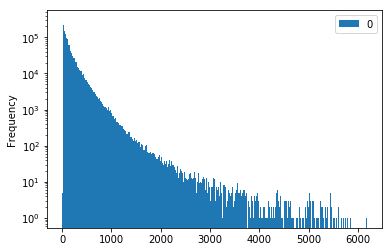

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.hist(len_summaries_df, bins=100)

new_len_text_df.plot.hist(bins=1000)
plt.yscale('log')
plt.show()

In [14]:
import pandas as pd
data = parse(dataset)

new_len_summary = [len(d['summary'].split()) for d in data]
new_len_summary_df = pd.DataFrame(new_len_summary)
new_len_summary_df.describe()

,0
count,4.032305e+06
mean,1.223277e+01
std,2.932587e+00
min,0.000000e+00
25%,1.000000e+01
50%,1.100000e+01
75%,1.300000e+01
max,5.800000e+01


## Explore summary text

#### Filter out summaries which is exactly same as part of review text. (only 5%)
#### 95% of the reviews are not exact same sentence with review test.

In [4]:
import gzip

dataset = '../../data/reviews.json.gz'

def parse(path):
    g = gzip.open(path, 'rb')
    for line in g:
        yield eval(line)

total_n = 0
count = 0
p = 10000
for data in parse(dataset):
    review = data['review']
    summary = data['summary']
    total_n +=1

    if summary in review:
        continue   
        
    count +=1  
    
    if count%p == 0:
        print('subset # {}, out of # {} .'.format(count, total_n))

print('Total reviews: {} \nFinal Subset: {} '.format(total_n, count))    

subset # 10000, out of # 10349 .
subset # 20000, out of # 20688 .
subset # 30000, out of # 31121 .
subset # 40000, out of # 41583 .
subset # 50000, out of # 52213 .
subset # 60000, out of # 63033 .
subset # 70000, out of # 73655 .
subset # 80000, out of # 84081 .
subset # 90000, out of # 94519 .
subset # 100000, out of # 104901 .
subset # 110000, out of # 115445 .
subset # 120000, out of # 125920 .
subset # 130000, out of # 136272 .
subset # 140000, out of # 146713 .
subset # 150000, out of # 157107 .
subset # 160000, out of # 167535 .
subset # 170000, out of # 177979 .
subset # 180000, out of # 188481 .
subset # 190000, out of # 198855 .
subset # 200000, out of # 209428 .
subset # 210000, out of # 219887 .
subset # 220000, out of # 230443 .
subset # 230000, out of # 240924 .
subset # 240000, out of # 251217 .
subset # 250000, out of # 261781 .
subset # 260000, out of # 272699 .
subset # 270000, out of # 283109 .
subset # 280000, out of # 293610 .
subset # 290000, out of # 304028 .
sub

subset # 2290000, out of # 2401489 .
subset # 2300000, out of # 2411944 .
subset # 2310000, out of # 2422406 .
subset # 2320000, out of # 2432862 .
subset # 2330000, out of # 2443369 .
subset # 2340000, out of # 2453881 .
subset # 2350000, out of # 2464370 .
subset # 2360000, out of # 2474845 .
subset # 2370000, out of # 2485293 .
subset # 2380000, out of # 2495784 .
subset # 2390000, out of # 2506323 .
subset # 2400000, out of # 2516787 .
subset # 2410000, out of # 2527283 .
subset # 2420000, out of # 2537725 .
subset # 2430000, out of # 2548253 .
subset # 2440000, out of # 2558744 .
subset # 2450000, out of # 2569299 .
subset # 2460000, out of # 2579793 .
subset # 2470000, out of # 2590271 .
subset # 2480000, out of # 2600790 .
subset # 2490000, out of # 2611272 .
subset # 2500000, out of # 2621791 .
subset # 2510000, out of # 2632277 .
subset # 2520000, out of # 2642792 .
subset # 2530000, out of # 2653280 .
subset # 2540000, out of # 2663804 .
subset # 2550000, out of # 2674298 .
s

In [5]:
count/total_n

0.9475059550306835